In [1]:
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid",context='talk', font_scale=1.1)
%matplotlib inline

import scipy as scp
import pandas as pd
import copy as cp
from tqdm import tqdm 
from itertools import cycle

In [2]:
%run metapop.py

In [3]:
fec_pars = {'A': {'OP50': [22.65, 68.45, 57.05, 33.4,  4.97], 'Novo': [11.66, 62.53, 47.13, 13.94,  0.72]},
            'C': {'OP50': [19.8 , 60.3 , 43.02, 19.9,  6.6], 'Novo': [16.88, 80.77, 77.7 , 16.28,  1.4]}}

mf_prob = {'A': {'OP50': 0.11, 'Novo': 0.83}, 'C': {'OP50': 1.0, 'Novo': 1.0}}
disp_rate = [0.01, 0.01]
dim = 20
metpop = MetaPopulation(dim, fec_pars, mf_prob, r_rate=disp_rate, pred_rate=2)
metpop.fill_pop()
metpop.add_pop((0,0), 'A')
metpop.add_pop((dim-1,dim-1), 'A')
metpop.add_pop((0,dim-1), 'C')
metpop.add_pop((dim-1,0), 'C')
metpop.set_diet_comp('OP50')

dis_t = []
dis_a = []
time = 1500
for i in tqdm(range(time)):
    metpop.simulate_pops_one_step()
    a, b = metpop.daur_dist
    t1, t2 = metpop.ra_dist
    dis_t.append((a, b))
    dis_a.append((t1, t2))
    metpop.disperse_dauer()

100%|██████████| 1500/1500 [01:03<00:00, 23.51it/s]


In [4]:
def safe_divide_arrays(array1, array2):
    result = np.zeros_like(array1, dtype=float) 
    for i in range(array1.shape[0]):
        for j in range(array1.shape[1]):
            divisor = array2[i, j]
            if divisor != 0:
                result[i, j] = array1[i, j] / divisor
            else:
                result[i, j] = np.nan  
    return result

 50%|████▉     | 748/1500 [04:17<04:18,  2.91it/s]


KeyboardInterrupt: 

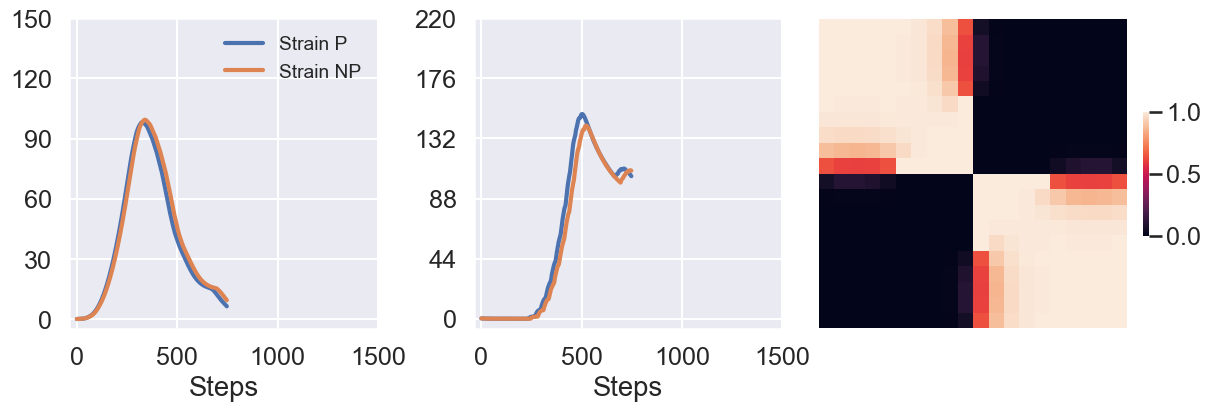

In [15]:
for trunc in tqdm(range(1500)):
    fig, axes = plt.subplots(
        nrows=1,
        ncols=3,
        figsize=(12, 4),
        constrained_layout=True)

    axes = axes.flatten()
    axes[0].plot([np.mean(i[0]) for i in dis_a[:trunc]], lw=3, label="Strain P")
    axes[0].plot([np.mean(i[1]) for i in dis_a[:trunc]], lw=3, label="Strain NP")

    axes[0].legend(loc='best', frameon=False, fontsize='x-small')

    axes[1].plot([np.mean(i[0]) for i in dis_t[:trunc]], lw=3, label="Strain P")
    axes[1].plot([np.mean(i[1]) for i in dis_t[:trunc]], lw=3, label="Strain NP")


    sns.heatmap(safe_divide_arrays(dis_t[trunc][0], dis_t[trunc][0] + dis_t[trunc][1]), ax=axes[2], vmin=0, vmax=1, cbar_kws={'ticks':[0, 0.5, 1], 'location':'right', 'shrink':0.4, 'pad':0.05}, square=True)
    axes[2].set_yticks(np.linspace(0, dim, dim))
    axes[2].set_xticks(np.linspace(0, dim, dim))
    yticks = axes[2].get_yticks()
    axes[2].set_yticklabels(['' for i in yticks])
    xticks = axes[2].get_xticks()
    axes[2].set_xticklabels(['' for i in xticks])

    for i in [0, 1]:
        axes[i].set_xlabel('Steps')
        axes[i].set_xticks(np.linspace(0, 1500, 4))

    axes[0].set_yticks(np.linspace(0, 150, 6))

    axes[1].set_yticks(np.linspace(0, 220, 6))
    plt.savefig('./t_series/OP50/d4_'+str(trunc)+'.jpeg', bbox_inches='tight', dpi=300)
    plt.close()